<a href="https://colab.research.google.com/github/ale-nunes/Desafio-vaga-DS/blob/main/Exploratory_Analysis_and_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você recebeu a tarefa de construir um classificador de notícias em 5 categorias:

1. Business
2. Entertainment
3. Politics
4. Sport
5. Tech

Para tal, você irá precisar fazer as seguintes subtarefas:

1. **Faça uma análise exploratória do dataset de notícias da BBC**
2. Pre-processe os textos para consumo por um algoritmo de aprendizado de máquina
3. Crie um classificador

Link para o dataset: [http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip](http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip)

# **Load Library**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import csv
from time import time
from nltk.tokenize import RegexpTokenizer

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Data Loading and Normalization**

**Directory data**

In [67]:
path_business = "/content/drive/MyDrive/data/bbc-fulltext/bbc/business"
path_ent = "/content/drive/MyDrive/data/bbc-fulltext/bbc/entertainment"
path_politics = "/content/drive/MyDrive/data/bbc-fulltext/bbc/politics"
path_sport = "/content/drive/MyDrive/data/bbc-fulltext/bbc/sport"
path_tech = "/content/drive/MyDrive/data/bbc-fulltext/bbc/tech"

In [68]:
business = []
entertainment = []
politics = []
sport = []
tech = []

business = [pd.read_csv(file, delimiter='\t', names =['texto'] ) for file in glob.glob(os.path.join(path_business ,"*.txt"))]
entertainment = [pd.read_csv(file, delimiter='\t', names =['texto'] ) for file in glob.glob(os.path.join(path_ent ,"*.txt"))]
politics = [pd.read_csv(file, delimiter='\t', names =['texto'] ) for file in glob.glob(os.path.join(path_politics ,"*.txt"))]
sport = [pd.read_csv(file, delimiter='\t', quoting=csv.QUOTE_NONE, encoding='utf-8', names =['texto'] ) for file in glob.glob(os.path.join(path_sport ,"*.txt"))]
tech = [pd.read_csv(file, delimiter='\t', names =['texto'] ) for file in glob.glob(os.path.join(path_tech ,"*.txt"))]

# Concatenate the list of DataFrames into one
df_business = pd.concat(business)
df_entertainment = pd.concat(entertainment)
df_politics = pd.concat(politics)
df_sport = pd.concat(sport)
df_tech = pd.concat(tech)

In [69]:
df_business.head(5)

,texto
0,UK economy facing 'major risks'
1,The UK manufacturing sector will continue to f...
2,The group's quarterly survey of companies foun...
3,Manufacturers' domestic sales growth fell back...
4,Despite some positive news for the export sect...


In [67]:
# df_entertainment.head()

In [68]:
# df_politics.head()

In [69]:
# df_tech.head()

In [71]:
# df_sport.head(5)

**Add Column Target**

In [72]:
df_business = df_business.assign(target='business')

In [73]:
df_entertainment = df_entertainment.assign(target='entertainment')

In [74]:
df_politics = df_politics.assign(target='politics')

In [75]:
df_tech = df_tech.assign(target='tech')

In [76]:
df_sport = df_sport.assign(target='sport')

In [77]:
df_business.head(5)

,texto,target
0,UK economy facing 'major risks',business
1,The UK manufacturing sector will continue to f...,business
2,The group's quarterly survey of companies foun...,business
3,Manufacturers' domestic sales growth fell back...,business
4,Despite some positive news for the export sect...,business


**Size DataFrame**

In [11]:
df_business.shape

(2682, 2)

In [70]:
# df_entertainment.head(5)

In [71]:
# df_entertainment.shape

In [72]:
# df_politics.head(5)

In [73]:
# df_politics.shape

In [74]:
# df_tech.head(5)

In [75]:
# df_tech.shape

In [79]:
# df_sport.head(5)

In [81]:
# df_sport.shape

**joining the Dataframes**

In [82]:
df = pd.concat([df_business, df_entertainment, df_politics, df_tech, df_sport])

In [83]:
df.head(10)

,texto,target
0,UK economy facing 'major risks',business
1,The UK manufacturing sector will continue to f...,business
2,The group's quarterly survey of companies foun...,business
3,Manufacturers' domestic sales growth fell back...,business
4,Despite some positive news for the export sect...,business
5,The BCC found confidence increased in the quar...,business
0,Euronext 'poised to make LSE bid',business
1,Pan-European group Euronext is poised to launc...,business
2,"Last week, the LSE rejected a takeover proposa...",business
3,Euronext already has a presence in London due ...,business


In [84]:
# df.to_csv('/content/drive/MyDrive/data/bbc-fulltext/bbc/base_completa_bbc.csv')

In [85]:
# path = '/content/drive/MyDrive/data/bbc-fulltext/bbc/base_completa_bbc.csv'
# df_base_completa = pd.read_csv(path)

In [87]:
# df_base_completa.head(3)

In [90]:
df.shape

(12853, 2)

In [91]:
df['target'].value_counts()

sport            2819
business         2682
politics         2679
tech             2567
entertainment    2106
Name: target, dtype: int64

In [106]:
# sns.countplot(df.target)

In [92]:
df_clean = df.copy()

In [93]:
df_clean.head(3)

,texto,target
0,UK economy facing 'major risks',business
1,The UK manufacturing sector will continue to f...,business
2,The group's quarterly survey of companies foun...,business


# **Text cleaning**

In [94]:
# Data Cleaning
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    
    return text

In [95]:
df_clean['clean_text'] = df_clean['texto'].apply(clean_text)

In [96]:
df_clean

,texto,target,clean_text
0,UK economy facing 'major risks',business,uk economy facing major risks
1,The UK manufacturing sector will continue to f...,business,the uk manufacturing sector will continue to f...
2,The group's quarterly survey of companies foun...,business,the group s quarterly survey of companies foun...
3,Manufacturers' domestic sales growth fell back...,business,manufacturers domestic sales growth fell back ...
4,Despite some positive news for the export sect...,business,despite some positive news for the export sect...
...,...,...,...
3,"Aged 18 years and 185 days, the Mallorcan beca...",sport,aged years and days the mallorcan became the y...
0,Old Firm pair handed suspensions,sport,old firm pair handed suspensions
1,Celtic's Henri Camara and Nacho Novo of Ranger...,sport,celtic s henri camara and nacho novo of ranger...
2,Both were given automatic one-match bans and 1...,sport,both were given automatic one match bans and a...


**Clean Data**

In [97]:
t = time()

#remoção de caracteres especiais 
tokenizer = RegexpTokenizer(r'\w+')
df_clean['clean_text'] = df_clean['clean_text'].astype('str') 

#stop words
stop = nltk.corpus.stopwords.words('english')

# exclui as stop words dos textos
df_clean['clean_text'] = df_clean['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_clean["tokens"] = df_clean["clean_text"].apply(tokenizer.tokenize)

print('Time to tokenize everything: {} mins'.format(round((time() - t) / 60, 2)))
df_clean.head()

Time to tokenize everything: 0.04 mins


,texto,target,clean_text,tokens
0,UK economy facing 'major risks',business,uk economy facing major risks,"[uk, economy, facing, major, risks]"
1,The UK manufacturing sector will continue to f...,business,uk manufacturing sector continue face serious ...,"[uk, manufacturing, sector, continue, face, se..."
2,The group's quarterly survey of companies foun...,business,group quarterly survey companies found exports...,"[group, quarterly, survey, companies, found, e..."
3,Manufacturers' domestic sales growth fell back...,business,manufacturers domestic sales growth fell back ...,"[manufacturers, domestic, sales, growth, fell,..."
4,Despite some positive news for the export sect...,business,despite positive news export sector worrying s...,"[despite, positive, news, export, sector, worr..."


# **Data Exploration**

In [98]:
# Plotly imports
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import cufflinks as cf
cf.go_offline()
plotly.offline.init_notebook_mode(connected = True)

# Other imports
from collections import Counter
# from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline

In [99]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [100]:
pio.renderers.default = 'colab'

**Target Variable Distribution**

In [101]:
# configure_plotly_browser_state()

data = [go.Bar(
            x = df_clean.target.unique(),
            y = df_clean.target.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = df_clean.target.value_counts().values
                        )
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

**Word Frequency (Top 50)**

In [102]:
# configure_plotly_browser_state()

all_words = df_clean['clean_text'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        )
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

**Wordcloud**

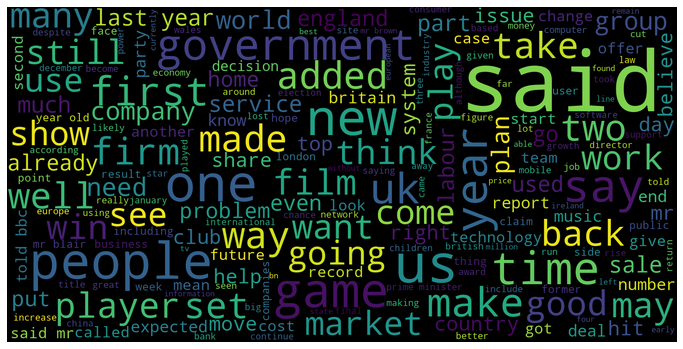

In [103]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in df_clean.clean_text)
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='viridis').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

# **Categorization of classes**

In [104]:
labels = df_clean['target'].astype('category').cat.categories.tolist()
replace_map_comp = {'target' : {k: v for k,v in zip(labels, list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'target': {'business': 1, 'entertainment': 2, 'politics': 3, 'sport': 4, 'tech': 5}}


In [105]:
df_clean.replace(replace_map_comp, inplace=True)

df_class = df_clean.copy()
df_class.head()

,texto,target,clean_text,tokens
0,UK economy facing 'major risks',1,uk economy facing major risks,"[uk, economy, facing, major, risks]"
1,The UK manufacturing sector will continue to f...,1,uk manufacturing sector continue face serious ...,"[uk, manufacturing, sector, continue, face, se..."
2,The group's quarterly survey of companies foun...,1,group quarterly survey companies found exports...,"[group, quarterly, survey, companies, found, e..."
3,Manufacturers' domestic sales growth fell back...,1,manufacturers domestic sales growth fell back ...,"[manufacturers, domestic, sales, growth, fell,..."
4,Despite some positive news for the export sect...,1,despite positive news export sector worrying s...,"[despite, positive, news, export, sector, worr..."


# **Training and Testing Separation**

In [106]:
x = df_class['clean_text']
y = df_class['target']

In [107]:
from sklearn.model_selection import train_test_split

SEED = 200
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=SEED, shuffle=True)

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text reviews to numbers
vec = CountVectorizer()
x_train = vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

**Applying Classifier - Naive Bayes**

# **Multinomial**

In [110]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [111]:
model.score(x_test, y_test)

0.9449284380833852

In [125]:
y_pred_mt = model.predict(x_test)

In [126]:
y_pred_mt

array([1, 4, 5, ..., 5, 5, 5])

In [127]:
from sklearn.metrics import accuracy_score

print('Model acurracy score {0:0.4f} '.format(accuracy_score(y_test, y_pred_mt)))

Model acurracy score 0.9449 


In [128]:
print('Training set score {0:0.4f} '.format(model.score(x_train, y_train)))

print('Teste set score {0:0.4f} '.format(model.score(x_test, y_test)))

Training set score 0.9720 
Teste set score 0.9449 


In [129]:
y_test.value_counts()

4    710
1    690
3    647
5    628
2    539
Name: target, dtype: int64

In [130]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_mt)

print('Confusion Matrix\n\n', cm)

print('\n True Positive (TP): ', cm[0,0])
print('\n True Negative (TN): ', cm[1,1])
print('\n False Positivo (FP)', cm[0,1])
print('\n False Negatico (FN)', cm[1,0])

Confusion Matrix

 [[633   2  29   6  20]
 [ 10 499   6   7  17]
 [ 16   2 621   1   7]
 [  3   6   4 692   5]
 [ 11  11   7   7 592]]

 True Positive (TP):  633

 True Negative (TN):  499

 False Positivo (FP) 2

 False Negatico (FN) 10


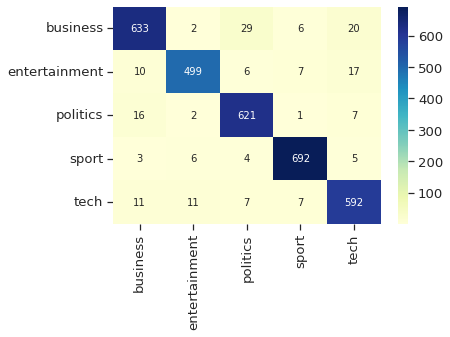

In [131]:
cm_matrix = pd.DataFrame(data=cm, columns=['business', 'entertainment', 'politics', 'sport', 'tech'], index=['business', 'entertainment', 'politics', 'sport', 'tech'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_mt))

              precision    recall  f1-score   support

           1       0.94      0.92      0.93       690
           2       0.96      0.93      0.94       539
           3       0.93      0.96      0.95       647
           4       0.97      0.97      0.97       710
           5       0.92      0.94      0.93       628

    accuracy                           0.94      3214
   macro avg       0.95      0.94      0.94      3214
weighted avg       0.95      0.94      0.94      3214



In [133]:
y_pred_prob_mt = model.predict_proba(x_test)[0:10]

y_pred_prob_mt

array([[9.99999796e-01, 1.38222497e-19, 2.03507823e-07, 4.03707037e-30,
        3.00814571e-15],
       [2.41147554e-02, 7.12011317e-02, 2.32766650e-02, 8.76162527e-01,
        5.24492107e-03],
       [8.66176605e-20, 2.80918589e-60, 7.47746707e-24, 1.33917535e-64,
        1.00000000e+00],
       [1.00000000e+00, 5.46688673e-36, 6.67932936e-22, 2.41002795e-42,
        3.68811214e-29],
       [4.78308002e-04, 3.70694113e-05, 3.82511450e-07, 5.85628186e-06,
        9.99478384e-01],
       [1.00000000e+00, 1.44311219e-27, 3.22536776e-24, 3.03598407e-30,
        2.25483879e-23],
       [9.91305807e-06, 1.25417059e-07, 5.64156343e-05, 1.29843237e-07,
        9.99933416e-01],
       [6.65898543e-03, 1.90176775e-02, 1.55043389e-03, 9.69883995e-01,
        2.88890784e-03],
       [9.99002085e-01, 5.29325771e-08, 9.97146464e-04, 1.79375087e-10,
        7.15559982e-07],
       [1.01694767e-06, 8.57757167e-33, 9.99998983e-01, 2.15639151e-40,
        8.10698384e-25]])

In [134]:
y_pred_prob_df_mt = pd.DataFrame(data=y_pred_prob_mt, columns=['business', 'entertainment', 'politics', 'sport','tech'])

y_pred_prob_df_mt

,business,entertainment,politics,sport,tech
0,9.999998e-01,1.382225e-19,2.035078e-07,4.037070e-30,3.008146e-15
1,2.411476e-02,7.120113e-02,2.327666e-02,8.761625e-01,5.244921e-03
2,8.661766e-20,2.809186e-60,7.477467e-24,1.339175e-64,1.000000e+00
3,1.000000e+00,5.466887e-36,6.679329e-22,2.410028e-42,3.688112e-29
4,4.783080e-04,3.706941e-05,3.825114e-07,5.856282e-06,9.994784e-01
5,1.000000e+00,1.443112e-27,3.225368e-24,3.035984e-30,2.254839e-23
6,9.913058e-06,1.254171e-07,5.641563e-05,1.298432e-07,9.999334e-01
7,6.658985e-03,1.901768e-02,1.550434e-03,9.698840e-01,2.888908e-03
8,9.990021e-01,5.293258e-08,9.971465e-04,1.793751e-10,7.155600e-07
9,1.016948e-06,8.577572e-33,9.999990e-01,2.156392e-40,8.106984e-25


{'target': {'business': 1, 'entertainment': 2, 'politics': 3, 'sport': 4, 'tech': 5}}


In [135]:
model.predict(vec.transform(['Love this app simply awesome!']))

array([5])

# **Model Gaussiano**

In [112]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

In [113]:
y_pred = gnb.predict(x_test)

y_pred

array([1, 4, 5, ..., 5, 5, 5])

**Metrics and Validation**

In [114]:
from sklearn.metrics import accuracy_score

print('Model acurracy score {0:0.4f} '.format(accuracy_score(y_test, y_pred)))

Model acurracy score 0.8923 


In [115]:
print('Training set score {0:0.4f} '.format(gnb.score(x_train, y_train)))

print('Teste set score {0:0.4f} '.format(gnb.score(x_test, y_test)))

Training set score 0.9570 
Teste set score 0.8923 


In [116]:
y_test.value_counts()

4    710
1    690
3    647
5    628
2    539
Name: target, dtype: int64

In [117]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n\n', cm)

print('\n True Positive (TP): ', cm[0,0])
print('\n True Negative (TN): ', cm[1,1])
print('\n False Positivo (FP)', cm[0,1])
print('\n False Negatico (FN)', cm[1,0])

Confusion Matrix

 [[608   6  29  21  26]
 [ 10 462  22  25  20]
 [ 22   8 581  29   7]
 [  3   4   6 692   5]
 [ 35  21  29  18 525]]

 True Positive (TP):  608

 True Negative (TN):  462

 False Positivo (FP) 6

 False Negatico (FN) 10


{'target': {'business': 1, 'entertainment': 2, 'politics': 3, 'sport': 4, 'tech': 5}}


---



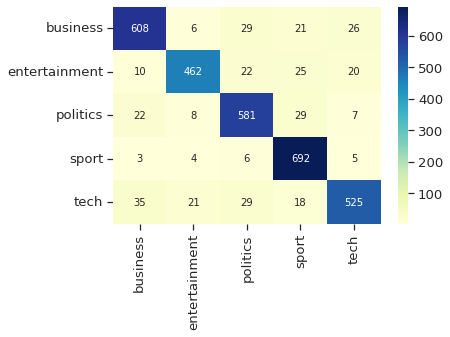

In [119]:
cm_matrix = pd.DataFrame(data=cm, columns=['business', 'entertainment', 'politics', 'sport', 'tech'], index=['business', 'entertainment', 'politics', 'sport', 'tech'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.88      0.89       690
           2       0.92      0.86      0.89       539
           3       0.87      0.90      0.88       647
           4       0.88      0.97      0.93       710
           5       0.90      0.84      0.87       628

    accuracy                           0.89      3214
   macro avg       0.89      0.89      0.89      3214
weighted avg       0.89      0.89      0.89      3214



In [121]:
y_pred_prob = gnb.predict_proba(x_test)[0:10]

y_pred_prob

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [123]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['business', 'entertainment', 'politics', 'sport','tech'])

y_pred_prob_df

,business,entertainment,politics,sport,tech
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0
